In [1]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [5]:
!tensorboard --logdir=./logs

TensorBoard 1.14.0 at http://8b842365bd42:6006/ (Press CTRL+C to quit)
W0806 09:55:25.184748 140173570254592 plugin_event_accumulator.py:294] Found more than one graph event per run, or there was a metagraph containing a graph_def, as well as one or more graph events.  Overwriting the graph with the newest event.
W0806 09:55:25.727031 140173570254592 plugin_event_accumulator.py:294] Found more than one graph event per run, or there was a metagraph containing a graph_def, as well as one or more graph events.  Overwriting the graph with the newest event.
W0806 09:55:26.649740 140173570254592 plugin_event_accumulator.py:294] Found more than one graph event per run, or there was a metagraph containing a graph_def, as well as one or more graph events.  Overwriting the graph with the newest event.
W0806 09:55:27.475264 140173570254592 plugin_event_accumulator.py:294] Found more than one graph event per run, or there was a metagraph containing a graph_def, as well as one or more graph events.

In [0]:
!pip install tensorflow-gpu==2.0.0a0
!pip install opencv-python==4.0.0.21


     |████████████████████████████████| 332.1MB 41kB/s 
     |████████████████████████████████| 419kB 40.4MB/s 
     |████████████████████████████████| 3.0MB 37.7MB/s 
     |████████████████████████████████| 25.4MB 12.4MB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: opencv-python 3.4.5.20
    Uninstalling opencv-python-3.4.5.20:
      Successfully uninstalled opencv-python-3.4.5.20


In [3]:
!pwd
!ls

/content
drive  sample_data


In [0]:
!git clone https://github.com/zzh8829/yolov3-tf2.git
 

In [4]:
%cd drive/My\ Drive/Telnet/yolov3-tf2
!ls


/content/drive/My Drive/Telnet/yolov3-tf2
checkpoints  detect.py	      export_tfserving.py  output.jpg	     train.py
convert.py   detect_video.py  LICENSE		   README.md	     yolov3_tf2
data	     environment.yml  logs		   requirements.txt


In [0]:
!wget https://pjreddie.com/media/files/yolov3.weights -O data/yolov3.weights
!python convert.py

--2019-08-02 09:23:48--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘data/yolov3.weights’

data/yolov3.weights 100%[===================>] 236.52M  40.7MB/s    in 5.4s    

2019-08-02 09:23:54 (43.6 MB/s) - ‘data/yolov3.weights’ saved [248007048/248007048]

W0802 09:23:59.480520 140098988713856 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "yolov3"
_____________________________________________________________________________________

In [0]:
!pwd

/content


In [0]:
!python detect.py --weights ./checkpoints/yolov3_train_10.tf --image ./data/TestImages1.0/posVideo4.873\ 1040.jpg

2019-08-05 13:36:15.570853: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2019-08-05 13:36:15.576985: I tensorflow/stream_executor/platform/default/dso_loader.cc:42] Successfully opened dynamic library libcuda.so.1
2019-08-05 13:36:15.676867: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1009] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2019-08-05 13:36:15.677871: I tensorflow/compiler/xla/service/service.cc:162] XLA service 0x163a680 executing computations on platform CUDA. Devices:
2019-08-05 13:36:15.677919: I tensorflow/compiler/xla/service/service.cc:169]   StreamExecutor device (0): Tesla K80, Compute Capability 3.7
2019-08-05 13:36:15.680514: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2300000000 Hz
2019-08-05 13:36:15.680755: I tensorflow/compiler/xla/serv

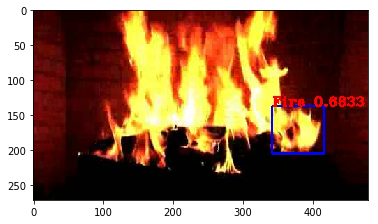

In [0]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.imshow(mpimg.imread('output.jpg'))

In [0]:
# Run this cell to mount your Google Drive.
from google.colab import drive
drive.mount('/content/drive')csv to tfrecord

In [0]:
!pwd

/content/yolov3-tf2


In [0]:
!python train.py --batch_size 16 --dataset data/train.record --val_dataset data/test.record --epochs 10 --mode fit --transfer none 

2019-08-05 07:43:01.015403: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2019-08-05 07:43:01.022400: I tensorflow/stream_executor/platform/default/dso_loader.cc:42] Successfully opened dynamic library libcuda.so.1
2019-08-05 07:43:01.215676: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1009] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2019-08-05 07:43:01.323325: I tensorflow/compiler/xla/service/service.cc:162] XLA service 0x2736680 executing computations on platform CUDA. Devices:
2019-08-05 07:43:01.323387: I tensorflow/compiler/xla/service/service.cc:169]   StreamExecutor device (0): Tesla K80, Compute Capability 3.7
2019-08-05 07:43:01.326009: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2300000000 Hz
2019-08-05 07:43:01.326289: I tensorflow/compiler/xla/serv